In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn import metrics

In [2]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [3]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
# checking the number of rows and columns
car_dataset.shape

(4340, 8)

In [5]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
# checking the number of missing values
car_dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
# checking the distribution of categorical data
print(car_dataset.fuel.value_counts())
print('*'*20)
print(car_dataset.seller_type.value_counts())
print('*'*20)
print(car_dataset.transmission.value_counts())
print('*'*20)
print(car_dataset.owner.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
********************
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
********************
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
********************
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


Encoding the Categorical Data

In [8]:
# encoding "Fuel_Type" Column
car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2, 'LPG': 3, 'Electric':4}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'seller_type':{'Dealer':0,'Individual':1, 'Trustmark Dealer': 2}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

# encoding "owner" Column
car_dataset.replace({'owner':{'First Owner':0,'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3, 'Test Drive Car':4 }},inplace=True)

C:\Users\amirh\AppData\Local\Temp\ipykernel_15664\1503224684.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2, 'LPG': 3, 'Electric':4}},inplace=True)
C:\Users\amirh\AppData\Local\Temp\ipykernel_15664\1503224684.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'seller_type':{'Dealer':0,'Individual':1, 'Trustmark Dealer': 2}},inplace=True)
C:\Users\amirh\AppData\Local\Temp\ipykernel_15664\1503224684.py:8: FutureWarning: Downcasting behavior in `rep

In [9]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,1,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,1,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,1,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,1


In [10]:
X = car_dataset.drop(['name','selling_price'],axis=1)
Y = car_dataset['selling_price']

In [11]:
print(X)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     0            1             0      0
1     2007      50000     0            1             0      0
2     2012     100000     1            1             0      0
3     2017      46000     0            1             0      0
4     2014     141000     1            1             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     1            1             0      1
4336  2014      80000     1            1             0      1
4337  2009      83000     0            1             0      1
4338  2016      90000     1            1             0      0
4339  2016      40000     0            1             0      0

[4340 rows x 6 columns]


In [12]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

1. Linear Regression

In [14]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [15]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [16]:
# prediction on Training data
Y_pred_lin = lin_reg_model.predict(X_test)

In [17]:
# R squared Error
error_score = metrics.r2_score(Y_test, Y_pred_lin)
print("R squared Error : ", error_score)

R squared Error :  0.48476328076537933


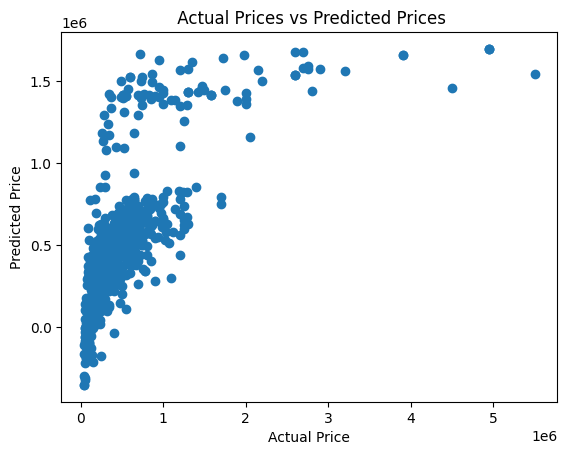

In [18]:
plt.scatter(Y_test, Y_pred_lin)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

2. Lasso Regression

In [19]:
# loading the linear regression model
lass_reg_model = Lasso()

In [20]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [21]:
# prediction on Training data
Y_pred_lasso = lass_reg_model.predict(X_test)

In [22]:
# R squared Error
error_score = metrics.r2_score(Y_test, Y_pred_lasso)
print("R squared Error : ", error_score)

R squared Error :  0.48476306480201936


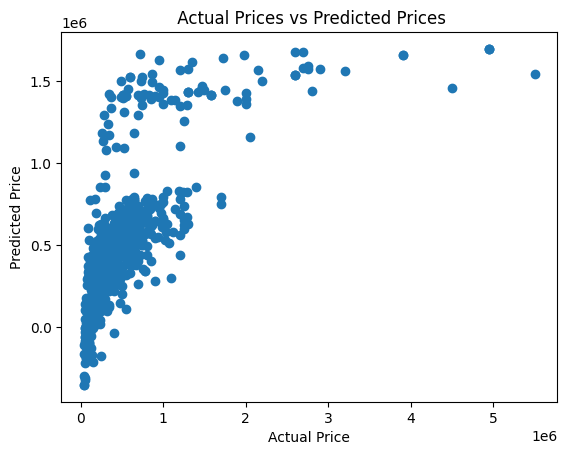

In [23]:
plt.scatter(Y_test, Y_pred_lasso)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [24]:
# loading the linear regression model
ridge_reg_model = Ridge()

In [25]:
ridge_reg_model.fit(X_train,Y_train)

Ridge()

In [26]:
# prediction on Training data
Y_pred_ridge = lass_reg_model.predict(X_test)

In [27]:
# R squared Error
error_score = metrics.r2_score(Y_test, Y_pred_ridge)
print("R squared Error : ", error_score)

R squared Error :  0.48476306480201936


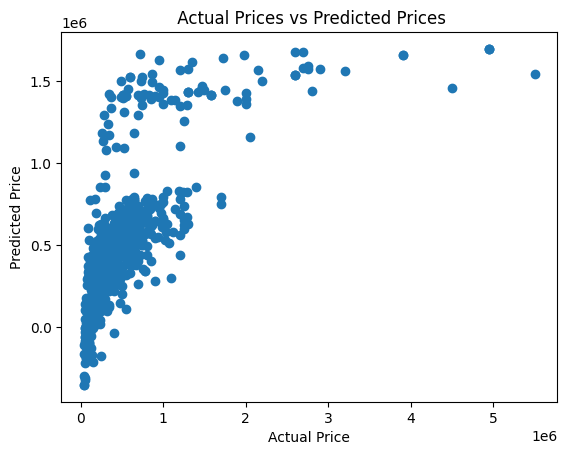

In [28]:
plt.scatter(Y_test, Y_pred_ridge)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

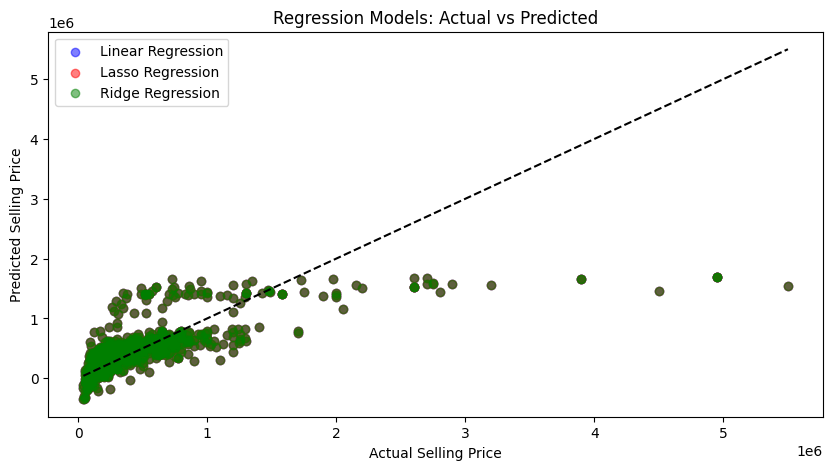

In [29]:
# Plot Regression Line (Actual vs Predicted Values)
plt.figure(figsize=(10, 5))
plt.scatter(Y_test, Y_pred_lin, color='blue', label='Linear Regression', alpha=0.5)
plt.scatter(Y_test, Y_pred_lasso, color='red', label='Lasso Regression', alpha=0.5)
plt.scatter(Y_test, Y_pred_ridge, color='green', label='Ridge Regression', alpha=0.5)

# Plot y=x line for reference
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='black', linestyle='dashed')

plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Regression Models: Actual vs Predicted")
plt.legend()
plt.show()